<a href="https://colab.research.google.com/github/DaniChinwendu/ML-FOR-COMPUTATIONAL-TOXICOLOGY/blob/main/ANN_REGRESSION_MODEL_(Sheseido%2CDPRA%2Ch_CLAT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
from google.colab import files
uploaded=files.upload()
import pandas as pd
import numpy as np

Saving SHESEIDO MODEL DATA.xlsx to SHESEIDO MODEL DATA.xlsx


In [2]:
df=pd.read_excel(io.BytesIO(uploaded['SHESEIDO MODEL DATA.xlsx']))

In [3]:
df.head()

,CASRN,LLNA_Category,Chemical,LLNAthreshold,logLLNAthreshold,logMinhCLAT,logDPRA,logImax,logMAC
0,886-38-4,Extreme,Diphenylcyclopropenone,0.003,-2.5229,0.593,1.7118,1.2281,2.666
1,15646-46-5,Extreme,Oxazolone,0.003,-2.5229,0.433,1.6390,0.2086,1.765
2,1897-45-6,Extreme,Chlorothalonil,0.004,-2.3979,-0.678,1.7071,1.2956,1.702
3,mixture,Extreme,MCI/MI,0.005,-2.3010,0.344,1.7292,0.4691,1.794
4,106-51-4,Extreme,"1,4-Benzoquinone",0.01,-2.0044,0.350,1.9680,1.7092,1.614


In [32]:
from numpy import mean
from numpy import absolute
from numpy import sqrt
from matplotlib import pyplot as plt

import re
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold,RepeatedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings # supress warnings
warnings.filterwarnings('ignore')



In [5]:

ANN_D_hC=df[['LLNAthreshold','logLLNAthreshold','logMinhCLAT','logDPRA']]
ANN_D_hC.head()

len(ANN_D_hC)

ANN_D_hC.head()

,LLNAthreshold,logLLNAthreshold,logMinhCLAT,logDPRA
0,0.003,-2.5229,0.593,1.7118
1,0.003,-2.5229,0.433,1.6390
2,0.004,-2.3979,-0.678,1.7071
3,0.005,-2.3010,0.344,1.7292
4,0.01,-2.0044,0.350,1.9680


# New Section

In [6]:
#Defining target and predictors
TargetVariable=['logLLNAthreshold']
Predictors=['logMinhCLAT','logDPRA']
X=ANN_D_hC[Predictors]
y=ANN_D_hC[TargetVariable]
y.head()

,logLLNAthreshold
0,-2.5229
1,-2.5229
2,-2.3979
3,-2.3010
4,-2.0044


In [7]:

PredictorScaler=MinMaxScaler()
TargetVarScaler=MinMaxScaler()
#Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
scaled_X = pd.DataFrame(X,columns=['logMinhCLAT','logDPRA'])
scaled_y = pd.DataFrame(y,columns=['logLLNAthreshold'])

scaled_X


,logMinhCLAT,logDPRA
0,0.290382,0.927950
1,0.253827,0.909750
2,0.000000,0.926775
3,0.233493,0.932300
4,0.234864,0.992000
...,...,...
134,0.840302,0.000000
135,0.840302,0.461275
136,1.000000,0.615600
137,0.797555,0.877475


In [8]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(scaled_X, scaled_y, test_size=0.2, random_state=0)



In [9]:
#Checking shape of the trainset and test set
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(111, 2)
(111, 1)
(28, 2)
(28, 1)


In [10]:
reg = MLPRegressor(hidden_layer_sizes=(5,2),activation="logistic" ,random_state=30, learning_rate_init=0.01,momentum=0.1, max_iter=500,solver ='lbfgs' ).fit(X_train, y_train)
y_pred=reg.predict(X_test)
print("The Score with ",(r2_score(y_pred, y_test)))
print('the mean squared error',(mean_squared_error(y_pred, y_test) ))


The Score with  0.5529089909455775
the mean squared error 0.018098260123112445


In [13]:
#implementing the 10 fold cross validation for r2 score the model for train set
cv = KFold(n_splits=10, random_state=0, shuffle=True)
#scoring=['neg_mean_squared_error']
model_CV=MLPRegressor(hidden_layer_sizes=(5,2),activation="logistic" ,random_state=1, learning_rate_init=0.01,momentum=0.1, max_iter=500,solver='lbfgs')
scores = cross_val_score(model_CV, X_train, y_train, scoring='r2', cv=cv)
print(np.mean(scores))

0.35547557680755365


In [14]:
#implementing the 10 fold cross validation for mean square error the model for train set
cv = KFold(n_splits=5, random_state=0, shuffle=True)
#scoring=['neg_mean_squared_error']
model_CV=MLPRegressor(hidden_layer_sizes=(5,2),activation="logistic" ,random_state=1, learning_rate_init=0.02,momentum=0.7, max_iter=500,solver='lbfgs')
scores = cross_val_score(model_CV, X_train, y_train, scoring='neg_mean_squared_error', cv=cv)
sqrt(mean(absolute(scores)))

0.15486012230886625

In [15]:
#EVALUATING THE MODEL WITH LEAVE ONE OUT On train set
cv=LeaveOneOut()
model=model_CV
scores = cross_val_score(model_CV,X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv)
scores=np.mean(scores)

sqrt(mean(absolute(scores)))

0.16445294559006468

In [16]:
len(X_train.columns)

2

In [17]:
#performing hyperperemeter tuning with grid sreach cross validation with REF using feature selection of 2 feature: this allowed to see the training and test score on the traing set
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
hyper_params = [{'n_features_to_select':list(range(1, len(X_train.columns)+1)) }]
model_G = MLPRegressor(hidden_layer_sizes=(5,2),activation="logistic" ,random_state=1, learning_rate_init=0.02,momentum=0.7, max_iter=500,solver='lbfgs')
lm = model_G
lm.fit(X_train, y_train)
rfe = RFE(lm) 

#rfe.support_  
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid= hyper_params,
                        scoring= 'r2',
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=100, shuffle=True),
             estimator=RFE(estimator=MLPRegressor(activation='logistic',
                                                  hidden_layer_sizes=(5, 2),
                                                  learning_rate_init=0.02,
                                                  max_iter=500, momentum=0.7,
                                                  random_state=1,
                                                  solver='lbfgs')),
             param_grid=[{'n_features_to_select': [1, 2]}],
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.055512,0.007003,0.000000,0.000000,1,{'n_features_to_select': 1},NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.063089,0.009502,0.003638,0.000136,2,{'n_features_to_select': 2},0.799427,0.579566,0.441841,0.466774,...,0.555493,0.556983,0.570577,0.579029,0.51739,0.530054,0.550779,0.574561,0.550716,0.020048


In [18]:
cv=KFold(n_splits = 10, shuffle = True, random_state = 100)

In [19]:
#performing Gridsearch for TESTING DIFFERENT OPTIMIZER
# define the grid search parameters
model=model_G
param = {
    'solver':['adam','sgd','ibfgs']}
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)
#neg_mean_absolute_error

Best Score: -0.08977958480523934
Best Hyperparameters: {'solver': 'sgd'}


In [20]:
#Grid search for the best activation function
model=model_G
param = {
    'activation':['relu','tahn','identity','softmax','logistics']}
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)
# execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.4115566742789426
Best Hyperparameters: {'activation': 'relu'}


In [21]:
# Leave One Out cross validation mean square error
cv=LeaveOneOut()
model=model_G
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
sqrt(mean(absolute(scores)))



0.16445294559006468

BUILDING THE FINAL MODEL


In [22]:
y_pred = model_G.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
RMSE=sklearn.metrics.mean_squared_error(y_test, y_pred)
print(r2)
print(RMSE)

0.6907502049227985
0.0188267776349659


Text(0, 0.5, 'predictions')

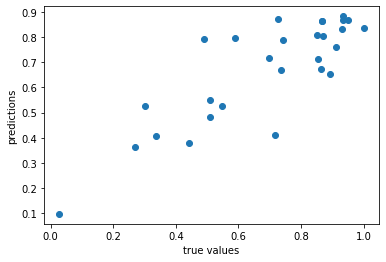

In [31]:
plt.scatter(y_test, y_pred)
plt.xlabel('true values')
plt.ylabel('predictions')

In [ ]:
# PERFORMING CROSS VALIDATION ON THE ENTIRE DATA SET
